## **Text Preprocessing**

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
books = pd.read_csv('../Data/childrens_books.csv')

In [3]:
books.head()

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education."
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice."
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading."


In [4]:
def lower_rempunc(sentence):
    lowercase = sentence.str.lower()
    output = lowercase.str.replace('\xa0',' ').str.replace(r'[^\w\s]','',regex=True)
    return output

In [5]:
books['Description_clean'] = lower_rempunc(books.Description)

### Text Preprocessing with spaCy

1. Tokeize Text
2. Lemmatize text
3. Remove stop words

In [6]:
books.head()

,Ranking,Title,Author,Year,Rating,Description,Description_clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",where the wild things are follows max a young boy who after being sent to his room for misbehaving imagines sailing to an island filled with wild creatures as their king max tames the beasts and eventually returns home to find his supper waiting for him this iconic book explores themes of imagination adventure and the complex emotions of childhood all captured through sendaks whimsical illustrations and story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",the very hungry caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly eric carles use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers the simple engaging story introduces children to days of the week counting and the concept of metamorphosis its a staple in early childhood education
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",the giving tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life as the boy grows up he takes more from the tree and the tree continues to give even when it has little left silversteins minimalist text and illustrations convey deep themes of unconditional love selflessness and the passage of time it has sparked much discussion about relationships and sacrifice
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",in green eggs and ham samiam tries to convince a reluctant character to try a dish of green eggs and ham despite his resistance through repetition and rhyme dr seusss classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone the playful illustrations and humorous dialogue make it a fun and educational read for young readers
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making

In [7]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [8]:
desc = books.Description_clean.iloc[0]

In [9]:
## Convert the text/ string into a spacy object
doc = nlp(desc)

In [10]:
## Create a function
def token_lemma_nonstop(text):
    doc = nlp(text)
    output = [token.lemma_ for token in doc if not token.is_stop]
    output = ' '.join(output) #Create a string of texts from the list
    return output

In [11]:
books['Description_clean'] = books['Description_clean'].apply(token_lemma_nonstop)

In [12]:
books.head()

,Ranking,Title,Author,Year,Rating,Description,Description_clean
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",wild thing follow max young boy send room misbehave imago sail island fill wild creature king max tame beast eventually return home find supper wait iconic book explore theme imagination adventure complex emotion childhood capture sendak whimsical illustration story
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",hungry caterpillar tell story caterpillar eat variety food eventually butterfly eric carles use colorful collage illustration rhythmic text book beloved classic young reader simple engaging story introduce child day week counting concept metamorphosis staple early childhood education
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",give tree touching bittersweet story tree give boy course life boy grow take tree tree continue little left silverstein minimalist text illustration convey deep theme unconditional love selflessness passage time spark discussion relationship sacrifice
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",green egg ham samiam try convince reluctant character try dish green egg ham despite resistance repetition rhyme dr seusss classic story open new experience encourage child adventurous try thing outside comfort zone playful illustration humorous dialogue fun educational read young reader
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading.",goodnight moon gentle rhythmic bedtime story little bunny say goodnight room moon quiet old lady whispering hush repetitive structure comfort tone ideal young child simple illustration clement hurd complement soothe nature story make beloved classic sleeptime reading


### **Count Vectorization**

In [13]:
## Vectorize clean and normalized text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
dtm = cv.fit_transform(books['Description_clean'])
dtm_df = pd.DataFrame(dtm.toarray(),columns=cv.get_feature_names_out())

In [14]:
## tune the hyperparameters
cv2 = CountVectorizer(stop_words='english',min_df=0.1) #Any term in less than 10% of documents are not considered
dtm2 = cv2.fit_transform(books['Description_clean'])
dtm2_df = pd.DataFrame(dtm2.toarray(),columns=cv2.get_feature_names_out())

In [15]:
dtm2_df

,adventure,beloved,book,boy,character,charming,child,classic,courage,early,...,tale,teach,tell,text,theme,timeless,way,whimsical,world,young
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,0,1,1,0,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
97,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
98,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
## Find Top 10 most common terms and top 10 least common terms
dtm_most_common = dtm2_df.sum().sort_values(ascending=False).head(10)

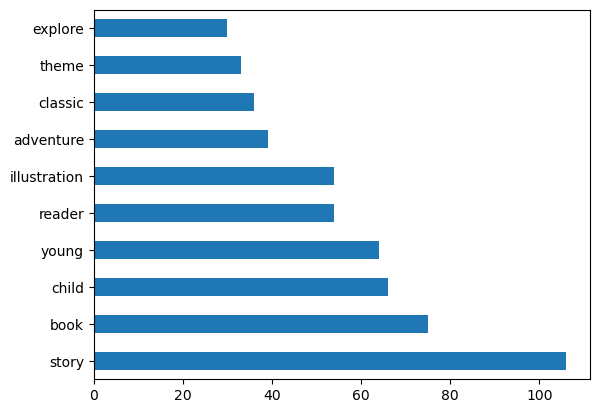

In [17]:
import matplotlib.pyplot as plt

dtm_most_common.plot(kind='barh');

In [18]:
dtm_least_common = dtm2_df.sum().sort_values(ascending=True).head(10)

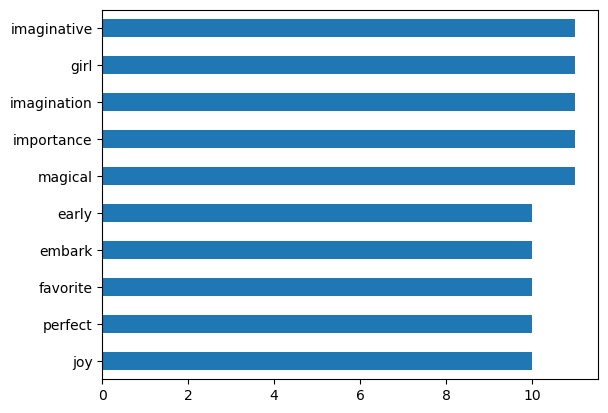

In [19]:
dtm_least_common.plot(kind='barh');

### **TF-IDF Vectorization**

In [20]:
from sklearn.feature_extraction.text import  TfidfVectorizer

ti = TfidfVectorizer()
tfidf = ti.fit_transform(books['Description_clean'])
tfidf_df = pd.DataFrame(tfidf.toarray(),columns=ti.get_feature_names_out())

In [23]:
## Tune the hypeparameters of the model to remove stop words and restrict the document ferquencies
ti = TfidfVectorizer(stop_words='english',ngram_range=(1,2),min_df=0.1, max_df=0.5)
tfidf = ti.fit_transform(books['Description_clean'])
tfidf_df = pd.DataFrame(tfidf.toarray(),columns=ti.get_feature_names_out())

In [25]:
tfidf_df

,adventure,beloved,boy,character,charming,classic,courage,early,embark,engage,...,tell,tell story,text,theme,timeless,way,whimsical,world,young child,young reader
0,0.284247,0.000000,0.404995,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.288310,0.000000,0.000000,0.404995,0.000000,0.000000,0.000000
1,0.000000,0.323152,0.000000,0.000000,0.0,0.247257,0.000000,0.396907,0.0,0.0,...,0.27313,0.290784,0.376297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311394
2,0.000000,0.000000,0.695432,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.00000,0.000000,0.356375,0.247534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.357801,0.0,0.257775,0.000000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324640
4,0.000000,0.385781,0.000000,0.000000,0.0,0.295177,0.000000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385781,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.0,0.607668,0.000000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.463859,0.000000,0.474868,0.000000,0.000000,0.000000
97,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.309008,0.000000,0.000000,0.000000,0.424007,0.000000,0.000000
98,0.310365,0.000000,0.000000,0.000000,0.0,0.000000,0.465112,0.000000,0.0,0.0,...,0.00000,0.000000,0.000000,0.314801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


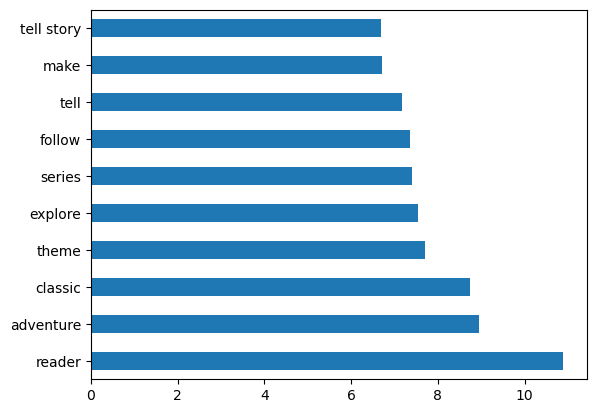

In [26]:
tfi_most_common = tfidf_df.sum().sort_values(ascending=False).head(10)
tfi_most_common.plot(kind='barh');

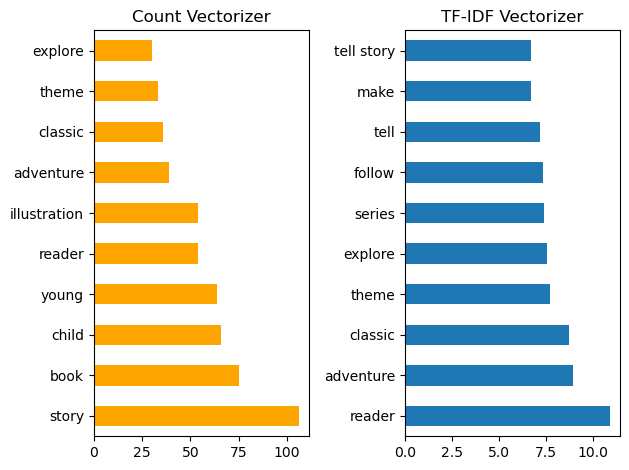

In [38]:
## Compare Countvectorizer and TF-IDF

fig, ax = plt.subplots(nrows=1, ncols=2)

dtm_most_common.plot(kind='barh', color='orange', ax=ax[0])
ax[0].set_title('Count Vectorizer')

tfi_most_common.plot(kind='barh',ax=ax[1])
ax[1].set_title('TF-IDF Vectorizer')

plt.tight_layout()
plt.show();

